In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [6]:
pip install openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 11.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openai


In [9]:
# Load the IMDb dataset
df = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')

# Basic data cleaning and preprocessing
df_clean = df.dropna(subset=['overview', 'genres']).copy()


/tmp/ipykernel_33/937328289.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')


In [22]:
# Initialize OpenAI API with your API key
openai.api_key = '9e263e92bbb5a7f2f53515915f2c3f83'

# Function to generate embeddings using OpenAI's GPT-3 model
def generate_embedding(text):
    response = openai.Embedding.create(
        model="text-davinci-003",  # You can choose the appropriate model
        input=text
    )
    return response['data']['embedding']

# Generate embeddings for movie descriptions
df_clean['embedding'] = df_clean['overview'].apply(generate_embedding)


APIRemovedInV1: 

You tried to access openai.Embedding, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


In [19]:
# Function to calculate cosine similarity based on embeddings
def calculate_similarity(embedding1, embedding2):
    return cosine_similarity([np.array(embedding1)], [np.array(embedding2)])[0][0]

# Function to get movie recommendations based on embeddings
def get_recommendations(title, embeddings, top_n=5):
    idx = df_clean[df_clean['title'] == title].index[0]
    similarities = df_clean['embedding'].apply(lambda x: calculate_similarity(embeddings[idx], x))
    indices = similarities.sort_values(ascending=False).head(top_n+1).index
    return df_clean.loc[indices]

# Example usage to recommend movies similar to 'The Dark Knight'
recommended_movies = get_recommendations('The Dark Knight', df_clean['embedding'])
print("Recommended movies for 'The Dark Knight':")
print(recommended_movies[['title', 'genres']])


KeyError: 'embedding'

In [11]:
# Function to generate embeddings using OpenAI's GPT-3 model
def generate_embeddings(text):
    response = openai.Embedding.create(
        model="text-davinci-003",  # You can choose the appropriate model
        input=text
    )
    return response['data']['embedding']

# Generate embeddings for movie descriptions
df_clean['embedding'] = df_clean['overview'].apply(generate_embeddings)


APIRemovedInV1: 

You tried to access openai.Embedding, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to calculate cosine similarity based on embeddings
def calculate_similarity(embedding1, embedding2):
    return cosine_similarity([np.array(embedding1)], [np.array(embedding2)])[0][0]

# Function to get movie recommendations based on embeddings
def get_recommendations(title, embeddings, top_n=5):
    idx = df_clean[df_clean['title'] == title].index[0]
    similarities = df_clean['embedding'].apply(lambda x: calculate_similarity(embeddings[idx], x))
    indices = similarities.sort_values(ascending=False).head(top_n+1).index
    return df_clean.loc[indices]

# Example usage to recommend movies similar to 'The Dark Knight'
recommended_movies = get_recommendations('The Dark Knight', df_clean['embedding'])
print("Recommended movies for 'The Dark Knight':")
print(recommended_movies[['title', 'genres']])


KeyError: 'embedding'

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


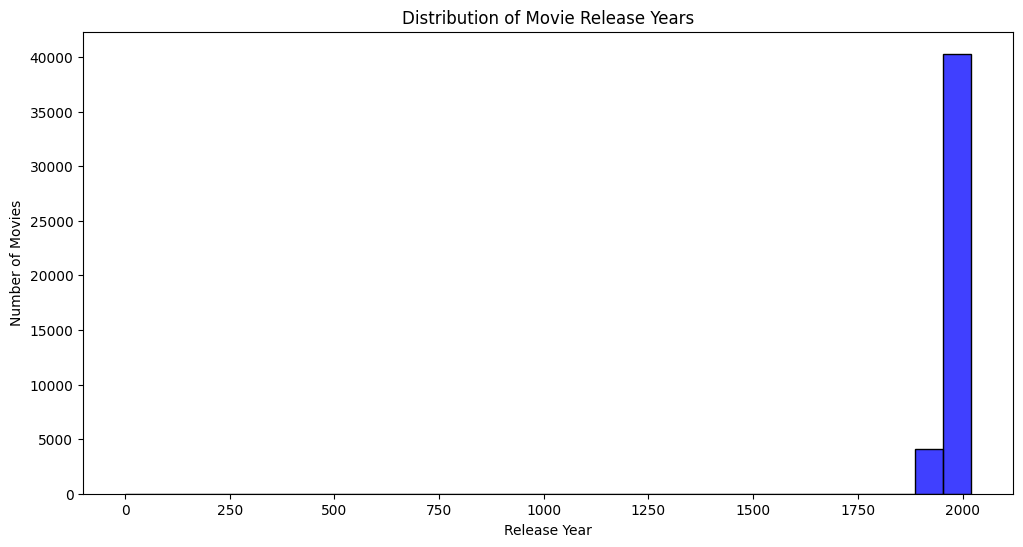

In [17]:
# Visualizations
# Example: Plotting the distribution of movie release years
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['release_date'].dropna().apply(lambda x: int(x[:4])), bins=30, kde=False, color='blue')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()


